# MODELLING AND SIMULATION FINAL PROJECT:
#Modeling and Simulation of Rumor Spreading in a Community

#### Team Member 1: Eunice Sayubu
#### Team Member 2: Vera Honam Anthonio
#### Team Member 3: Sedinam
#### Team Member 4: Maame Yaa
#### Team Member 5: Delice Ishimwe

#LOAD NECESSARY LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from scipy.integrate import solve_ivp
import datetime as dt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')

#1. DATA COLLECTION


#Download and Load Dataset


####Diggs 2009 Dataset
####Source: FigShare.com

In [ ]:
# Set the style for visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")



In [ ]:
friends_df = pd.read_csv('digg_friends.csv', header=None)
votes_df = pd.read_csv('digg_votes.csv', header=None)

# Add column names based on the provided schema
friends_df.columns = ['mutual', 'friend_date', 'user_id', 'friend_id']
votes_df.columns = ['vote_date', 'voter_id', 'story_id']

In [ ]:
# Display basic information about the datasets
print("\nFriends dataset information:")
print(f"Shape: {friends_df.shape}")
print(friends_df.head())

print("\nVotes dataset information:")
print(f"Shape: {votes_df.shape}")
print(votes_df.head())


Friends dataset information:
Shape: (1731658, 4)
   mutual  friend_date  user_id  friend_id
0       1   1214799565   336224     266641
1       0   1230047012   336224     215086
2       1   1194104160   336224     151094
3       0   1199180573   336224      59378
4       0   1196465462   336224       8547

Votes dataset information:
Shape: (3018197, 3)
    vote_date  voter_id  story_id
0  1246573330       318         1
1  1246603391       399         1
2  1246573479      1749         1
3  1246599553      1964         1
4  1246568035      4362         1


In [ ]:
friends_df

,mutual,friend_date,user_id,friend_id
0,1,1214799565,336224,266641
1,0,1230047012,336224,215086
2,1,1194104160,336224,151094
3,0,1199180573,336224,59378
4,0,1196465462,336224,8547
...,...,...,...,...
1731653,0,0,5,257604
1731654,1,1192718299,5,255107
1731655,1,1192718299,5,192330
1731656,0,0,5,171835


In [ ]:
votes_df

,vote_date,voter_id,story_id
0,1246573330,318,1
1,1246603391,399,1
2,1246573479,1749,1
3,1246599553,1964,1
4,1246568035,4362,1
...,...,...,...
3018192,1243937518,334596,3553
3018193,1243988005,334812,3553
3018194,1243909670,335028,3553
3018195,1243910982,335204,3553


###EXPLORATORY DATA ANALYSIS

In [ ]:
# Basic statistics for the datasets
print("\nFriends dataset statistics:")
print(friends_df.describe())

print("\nVotes dataset statistics:")
print(votes_df.describe())


Friends dataset statistics:
             mutual   friend_date       user_id     friend_id
count  1.731658e+06  1.731658e+06  1.731658e+06  1.731658e+06
mean   5.118418e-01  1.219580e+09  1.690137e+05  1.709531e+05
std    4.998599e-01  4.372407e+07  9.833971e+04  9.822858e+04
min    0.000000e+00  0.000000e+00  5.000000e+00  1.000000e+00
25%    0.000000e+00  1.208783e+09  8.270200e+04  8.642925e+04
50%    1.000000e+00  1.224817e+09  1.668240e+05  1.705820e+05
75%    1.000000e+00  1.238103e+09  2.568150e+05  2.576040e+05
max    1.000000e+00  1.247033e+09  3.362240e+05  3.362250e+05

Votes dataset statistics:
          vote_date      voter_id      story_id
count  3.018197e+06  3.018197e+06  3.018197e+06
mean   1.245300e+09  1.662883e+05  1.767381e+03
std    7.750953e+05  9.842756e+04  1.012042e+03
min    1.243770e+09  2.000000e+00  1.000000e+00
25%    1.244635e+09  7.905100e+04  8.560000e+02
50%    1.245307e+09  1.660930e+05  1.774000e+03
75%    1.245961e+09  2.515810e+05  2.666000e+03
ma

The Friends dataset contains approximately 1.73 million entries, with mutual friendships being fairly balanced (mean ≈ 0.51). User and friend IDs range from very low (1 or 5) to a maximum of over 336,000, suggesting a large and diverse user base.

In contrast, the Votes dataset includes over 3 million vote records. Voter IDs and story IDs follow a similar distribution to user IDs in the friends dataset, supporting the idea of overlap in platform users. Overall, the datasets reflect a large, active social platform with temporally clustered voting behavior and widespread friend connections.

In [ ]:
# Convert Unix timestamps to datetime for better readability
friends_df['friend_date'] = pd.to_datetime(friends_df['friend_date'], unit='s')
votes_df['vote_date'] = pd.to_datetime(votes_df['vote_date'], unit='s')

print("\nFriends dataset information:")
print(f"Shape: {friends_df.shape}")
print(friends_df.head())

print("\nVotes dataset information:")
print(f"Shape: {votes_df.shape}")
print(votes_df.head())


Friends dataset information:
Shape: (1731658, 4)
   mutual         friend_date  user_id  friend_id
0       1 2008-06-30 04:19:25   336224     266641
1       0 2008-12-23 15:43:32   336224     215086
2       1 2007-11-03 15:36:00   336224     151094
3       0 2008-01-01 09:42:53   336224      59378
4       0 2007-11-30 23:31:02   336224       8547

Votes dataset information:
Shape: (3018197, 3)
            vote_date  voter_id  story_id
0 2009-07-02 22:22:10       318         1
1 2009-07-03 06:43:11       399         1
2 2009-07-02 22:24:39      1749         1
3 2009-07-03 05:39:13      1964         1
4 2009-07-02 20:53:55      4362         1


In [ ]:
# Calculate time-based metrics for votes
votes_df['vote_date_only'] = votes_df['vote_date'].dt.date

# Group votes by story and date to see the temporal pattern of votes (which we'll use as feature for rumor spreading)
story_votes_by_date = votes_df.groupby(['story_id', 'vote_date_only']).size().reset_index(name='votes_count')

print("\nStory votes by date (sample):")
print(story_votes_by_date.head())




Story votes by date (sample):
   story_id vote_date_only  votes_count
0         1     2009-07-02          371
1         1     2009-07-03          187
2         1     2009-07-04           21
3         1     2009-07-05            4
4         2     2009-07-02          247


This chunk counts how many votes each story received on each day, giving us an insight into how voting activity for stories changes over time

In [ ]:
# Find the most popular stories (those with the most votes)
story_popularity = votes_df.groupby('story_id').size().reset_index(name='total_votes')
story_popularity = story_popularity.sort_values('total_votes', ascending=False)

print("\nTop 10 most popular stories:")
print(story_popularity.head(10))


Top 10 most popular stories:
      story_id  total_votes
713        714        24099
1122      1123         8521
501        502         8492
2718      2719         8057
2049      2050         7825
695        696         7549
1522      1523         7372
2079      2080         7371
1347      1348         7219
1815      1816         7151


In [ ]:
# Create network metrics: extract users who are both voters and have friendship data
all_users_in_friends = set(friends_df['user_id']).union(set(friends_df['friend_id']))
voters_with_friends = set(votes_df['voter_id']).intersection(all_users_in_friends)

print(f"\nNumber of voters with friendship data: {len(voters_with_friends)}")



Number of voters with friendship data: 82815


In [ ]:
# Get user engagement metrics
user_activity = votes_df.groupby('voter_id').size().reset_index(name='vote_count')
user_activity = user_activity.sort_values('vote_count', ascending=False)

print("\nTop 10 most active users:")
print(user_activity.head(10))


Top 10 most active users:
        voter_id  vote_count
84539     202320       10526
82109     196286        3415
111157    265884        3400
53153     126245        3139
112705    269430        2939
8770       20413        2793
129402    310354        2642
110437    264135        2556
39374      93316        2450
105022    251084        2428


This identifies and displays the top 10 most active users on the platform based on their voting activity, providing insight into which users are most engaged as these highly active users could play significant roles in how information disseminates within the network.

In [ ]:
# Stack both columns into one Series, count, and reset:
all_ids = pd.concat([friends_df['user_id'], friends_df['friend_id']], ignore_index=True)
user_connections = (
    all_ids
      .value_counts()
      .rename_axis('user_id')
      .reset_index(name='total_connections')
      .sort_values('total_connections', ascending=False)
)
print(user_connections.head())


   user_id  total_connections
0   171835              12204
1   112748               9291
2   326248               7669
3    80505               5957
4   257604               5501


In [ ]:
#Top 10 users with most connections
print(user_connections.head(10))

   user_id  total_connections
0   171835              12204
1   112748               9291
2   326248               7669
3    80505               5957
4   257604               5501
5   129511               3818
6   127771               3130
7   310316               2741
8   291970               2678
9   193821               2447


In [ ]:
# Analyze temporal patterns
votes_df['hour'] = votes_df['vote_date'].dt.hour
votes_df['day_of_week'] = votes_df['vote_date'].dt.dayofweek


In [ ]:
#Here we see how voting patterns change over time after a story is submitted

# For each story, determine the first vote time (submission time)
story_first_vote = votes_df.groupby('story_id')['vote_date'].min().reset_index()
story_first_vote.rename(columns={'vote_date': 'submission_time'}, inplace=True)

# Merge this information back to the votes dataframe
votes_with_submission = pd.merge(votes_df, story_first_vote, on='story_id')

# Calculate the time since submission for each vote (in hours)
votes_with_submission['hours_since_submission'] = (votes_with_submission['vote_date'] -
                                                 votes_with_submission['submission_time']).dt.total_seconds() / 3600

print("Votes with time since submission (sample):")
print(votes_with_submission[['story_id', 'voter_id', 'vote_date', 'submission_time', 'hours_since_submission']].head())


Votes with time since submission (sample):
   story_id  voter_id           vote_date     submission_time  \
0         1       318 2009-07-02 22:22:10 2009-07-02 19:31:18   
1         1       399 2009-07-03 06:43:11 2009-07-02 19:31:18   
2         1      1749 2009-07-02 22:24:39 2009-07-02 19:31:18   
3         1      1964 2009-07-03 05:39:13 2009-07-02 19:31:18   
4         1      4362 2009-07-02 20:53:55 2009-07-02 19:31:18   

   hours_since_submission  
0                2.847778  
1               11.198056  
2                2.889167  
3               10.131944  
4                1.376944  


In [ ]:
# Group by story_id and hours (binned) to get the vote distribution over time
def round_to_hour(x):
    return round(x * 2) / 2  # Round to nearest half-hour

votes_with_submission['hours_binned'] = votes_with_submission['hours_since_submission'].apply(round_to_hour)
votes_hourly = votes_with_submission.groupby(['story_id', 'hours_binned']).size().reset_index(name='votes_in_period')

# Calculate cumulative votes for each story over time
story_cumulative_votes = votes_hourly.groupby('story_id').apply(
    lambda x: x.sort_values('hours_binned').assign(
        cumulative_votes=lambda df: df['votes_in_period'].cumsum()
    )
).reset_index(drop=True)

print("\nCumulative votes over time (sample):")
print(story_cumulative_votes.head())



Cumulative votes over time (sample):
   story_id  hours_binned  votes_in_period  cumulative_votes
0         1           0.0               11                11
1         1           0.5               29                40
2         1           1.0               15                55
3         1           1.5                8                63
4         1           2.0              104               167


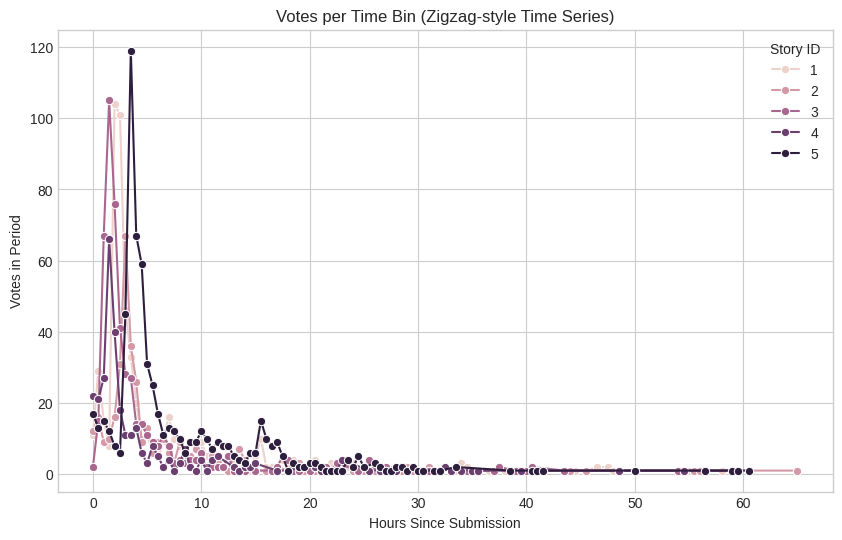

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pick a few stories to visualize
sample_stories = story_cumulative_votes['story_id'].unique()[:5]
subset = votes_hourly[votes_hourly['story_id'].isin(sample_stories)]

plt.figure(figsize=(10, 6))
sns.lineplot(data=subset, x='hours_binned', y='votes_in_period', hue='story_id', marker='o')
plt.title("Votes per Time Bin (Zigzag-style Time Series)")
plt.xlabel("Hours Since Submission")
plt.ylabel("Votes in Period")
plt.grid(True)
plt.legend(title='Story ID')
plt.show()


Here we group votes based on which story they were for and which half-hour interval they fell into. We then count the number of votes within each group, and this count is stored. This allows us to see how the popularity of a story grows over time. This information can then be used to model and understand how rumors might spread.

### SELECT ONE OF THE POPULAR STORIES FOR DETAILED ANALYSIS

###Dependent Variable: spread of specific rumor (story id 714)

In [ ]:
# We'll pick the story with the most votes
top_story_id = story_popularity.iloc[0]['story_id']
print(f"Selected story ID: {top_story_id}")

# Get all votes for this story
top_story_votes = votes_df[votes_df['story_id'] == top_story_id].sort_values('vote_date')

Selected story ID: 714


In [ ]:
# Analyze the temporal spread of this story
top_story_votes['minutes_since_first'] = (top_story_votes['vote_date'] - top_story_votes['vote_date'].min()).dt.total_seconds() / 60
top_story_hourly = top_story_votes.copy()
top_story_hourly['hour_bin'] = (top_story_hourly['minutes_since_first'] / 60).apply(lambda x: int(x))
votes_per_hour = top_story_hourly.groupby('hour_bin').size().reset_index(name='votes')
votes_per_hour['cumulative_votes'] = votes_per_hour['votes'].cumsum()

   hour_bin  votes  cumulative_votes
0         0   4226              4226
1         1   4696              8922
2         2   2632             11554
3         3   1857             13411
4         4   1560             14971


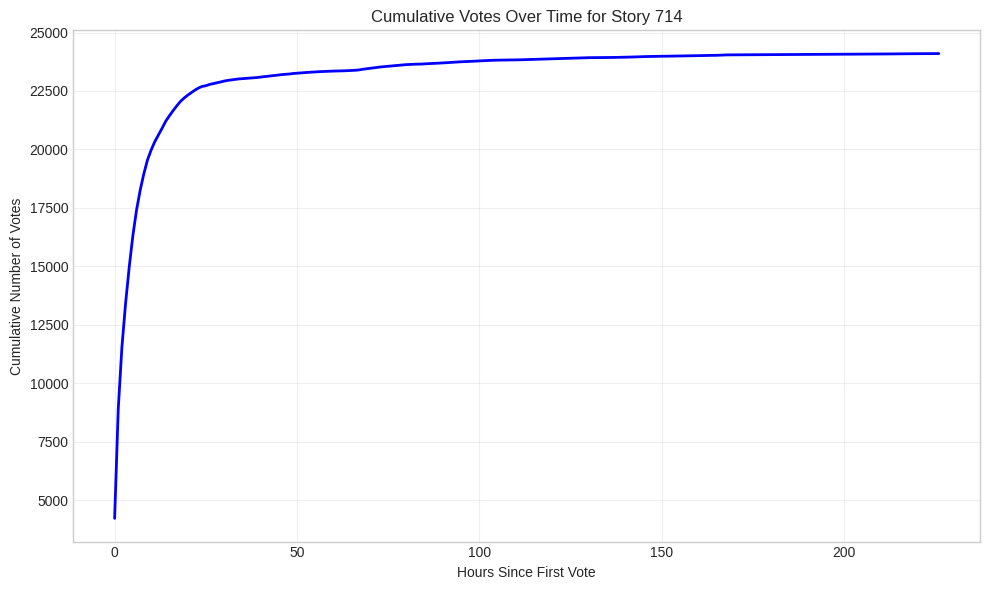

In [ ]:
#Votes per hour for the top story
print(votes_per_hour.head())

# Plot the cumulative votes for the top story
plt.figure(figsize=(10, 6))
plt.plot(votes_per_hour['hour_bin'], votes_per_hour['cumulative_votes'], 'b-', linewidth=2)
plt.title(f'Cumulative Votes Over Time for Story {top_story_id}')
plt.xlabel('Hours Since First Vote')
plt.ylabel('Cumulative Number of Votes')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

###Independent Variable: social media activity levels (top_story_voters)

In [ ]:
# Create a network of voters for the most popular story
top_story_voters = set(top_story_votes['voter_id'])
print(f"\nNumber of voters for the top story: {len(top_story_voters)}")

# Identify friend relationships among these voters
voter_friends = friends_df[
    (friends_df['user_id'].isin(top_story_voters)) &
    (friends_df['friend_id'].isin(top_story_voters))
]

print(f"Number of friendship connections among voters: {len(voter_friends)}")


Number of voters for the top story: 24067
Number of friendship connections among voters: 61196


Literacy index for voters of top story


In [ ]:
# Merge votes with submission times
merged_df = pd.merge(votes_df, story_first_vote, on='story_id', how='left')

# Calculate time difference in minutes
merged_df['time_diff'] = (merged_df['vote_date'] - merged_df['submission_time']).dt.total_seconds() / 60

# Group by voter and calculate the average time difference
voter_avg_time_diff = merged_df.groupby('voter_id')['time_diff'].mean().reset_index()

# Rename columns for clarity
voter_avg_time_diff.columns = ['voter_id', 'avg_vote_time_diff']

# Merge with the main dataframe (assuming 'votes_df' is your primary dataframe)
votes_df = pd.merge(votes_df, voter_avg_time_diff, on='voter_id', how='left')


votes_df['literacy'] = votes_df['avg_vote_time_diff']


In [ ]:
top_story_voters_df = votes_df[votes_df['voter_id'].isin(top_story_voters)]
print(top_story_voters_df[['voter_id', 'literacy']])

         voter_id     literacy
0             318  2999.968293
2            1749  1430.771739
3            1964  1125.860317
5            4610  1432.205556
9            5941   767.696364
...           ...          ...
3018180    331943  1126.995945
3018184    332522  1102.396784
3018188    333484  1410.341499
3018190    334407  1453.292005
3018193    334812  1152.266870

[1363408 rows x 2 columns]


The idea is that users who are quick to vote on a story might be more comfortable with digital technology, which could correlate with better education and literacy.

In [ ]:
# Calculate the time since the first vote for each user in the top story
top_story_votes['time_since_first_vote'] = (top_story_votes['vote_date'] - top_story_votes['vote_date'].min()).dt.total_seconds() / 60

# Create a proxy for trust based on the time since the first vote
# (e.g., lower time difference = higher trust)
top_story_votes['trust_proxy'] = 1 / (1 + top_story_votes['time_since_first_vote'])  # Inverse relationship

# Normalize the trust proxy to be between 0 and 1
top_story_votes['trust_proxy'] = (top_story_votes['trust_proxy'] - top_story_votes['trust_proxy'].min()) / (top_story_votes['trust_proxy'].max() - top_story_votes['trust_proxy'].min())

print(top_story_votes[['voter_id', 'vote_date', 'time_since_first_vote', 'trust_proxy']].head())



        voter_id           vote_date  time_since_first_vote  trust_proxy
639992    332346 2009-06-25 21:42:46               0.000000     1.000000
635382    266353 2009-06-25 21:43:37               0.850000     0.540507
633072    234047 2009-06-25 21:43:40               0.900000     0.526281
617426     16255 2009-06-25 21:43:52               1.100000     0.476152
631543    212449 2009-06-25 21:44:02               1.266667     0.441135


This proxy represents an estimate of their trust in the information source, with higher values indicating higher trust.  This is based on the assumption that faster reactions to information indicate higher trust in that information source.

#2. DATA PREPROCESSING

In [ ]:
#Handle missing values
print("Missing in friends_df:\n", friends_df.isnull().sum())
print("Missing in votes_df:\n",   votes_df.isnull().sum())

friends_df.dropna(inplace=True)
votes_df.dropna(inplace=True)



Missing in friends_df:
 mutual         0
friend_date    0
user_id        0
friend_id      0
dtype: int64
Missing in votes_df:
 vote_date             0
voter_id              0
story_id              0
vote_date_only        0
hour                  0
day_of_week           0
avg_vote_time_diff    0
literacy              0
dtype: int64


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Select numeric columns for normalization
numeric_cols_friends = ['mutual']
# numeric_cols_friends = ['friend_date']
numeric_cols_votes = ['avg_vote_time_diff', 'literacy']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the numeric features in friends_df
friends_df[numeric_cols_friends] = scaler.fit_transform(friends_df[numeric_cols_friends])

# Fit and transform the numeric features in votes_df
votes_df[numeric_cols_votes] = scaler.fit_transform(votes_df[numeric_cols_votes])

print("\nNormalized friends_df:")
print(friends_df.head())
print("\nNormalized votes_df:")
print(votes_df.head())


Normalized friends_df:
   mutual         friend_date  user_id  friend_id
0     1.0 2008-06-30 04:19:25   336224     266641
1     0.0 2008-12-23 15:43:32   336224     215086
2     1.0 2007-11-03 15:36:00   336224     151094
3     0.0 2008-01-01 09:42:53   336224      59378
4     0.0 2007-11-30 23:31:02   336224       8547

Normalized votes_df:
            vote_date  voter_id  story_id vote_date_only  hour  day_of_week  \
0 2009-07-02 22:22:10       318         1     2009-07-02    22            3   
1 2009-07-03 06:43:11       399         1     2009-07-03     6            4   
2 2009-07-02 22:24:39      1749         1     2009-07-02    22            3   
3 2009-07-03 05:39:13      1964         1     2009-07-03     5            4   
4 2009-07-02 20:53:55      4362         1     2009-07-02    20            3   

   avg_vote_time_diff  literacy  
0            0.063522  0.063522  
1            0.033893  0.033893  
2            0.030295  0.030295  
3            0.023839  0.023839  
4        

In [ ]:
#Normalize numeric features in votes_per_hour
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
votes_per_hour[['hour_norm','votes_norm','cumvotes_norm']] = scaler.fit_transform(
    votes_per_hour[['hour_bin','votes','cumulative_votes']]
)
print(votes_per_hour.head())


   hour_bin  votes  cumulative_votes  hour_norm  votes_norm  cumvotes_norm
0         0   4226              4226   0.000000    0.899894       0.000000
1         1   4696              8922   0.004425    1.000000       0.236301
2         2   2632             11554   0.008850    0.560383       0.368742
3         3   1857             13411   0.013274    0.395314       0.462185
4         4   1560             14971   0.017699    0.332055       0.540683


In [ ]:
import pandas as pd

# Create a mapping from voter_id to trust_proxy
trust_proxy_mapping = top_story_votes.set_index('voter_id')['trust_proxy'].to_dict()

# Use the mapping to assign trust_proxy to votes_df based on voter_id
votes_df['trust_proxy'] = votes_df['voter_id'].map(trust_proxy_mapping)

# Assign other columns (hour_bin, votes, literacy) as before
votes_df['hour_bin'] = votes_per_hour['hour_bin']
votes_df['votes'] = votes_per_hour['votes']
votes_df['literacy'] = top_story_voters_df['literacy']

votes_df.fillna(0, inplace=True)  # Handle potential missing values
print(votes_df.head())

            vote_date  voter_id  story_id vote_date_only  hour  day_of_week  \
0 2009-07-02 22:22:10       318         1     2009-07-02    22            3   
1 2009-07-03 06:43:11       399         1     2009-07-03     6            4   
2 2009-07-02 22:24:39      1749         1     2009-07-02    22            3   
3 2009-07-03 05:39:13      1964         1     2009-07-03     5            4   
4 2009-07-02 20:53:55      4362         1     2009-07-02    20            3   

   avg_vote_time_diff     literacy  trust_proxy  hour_bin   votes  
0            0.063522  2999.968293     0.007401       0.0  4226.0  
1            0.033893     0.000000     0.000000       1.0  4696.0  
2            0.030295  1430.771739     0.008441       2.0  2632.0  
3            0.023839  1125.860317     0.008481       3.0  1857.0  
4            0.052861     0.000000     0.000000       4.0  1560.0  


In [ ]:
# Correlation analysis
import seaborn as sns
import matplotlib.pyplot as plt

# Rename columns in votes_per_hour before calculating correlation
votes_per_hour = votes_per_hour.rename(columns={
    'hour_norm': 'trust_proxy',
    'votes_norm': 'literacy',
    'cumvotes_norm': 'activity_level'
})

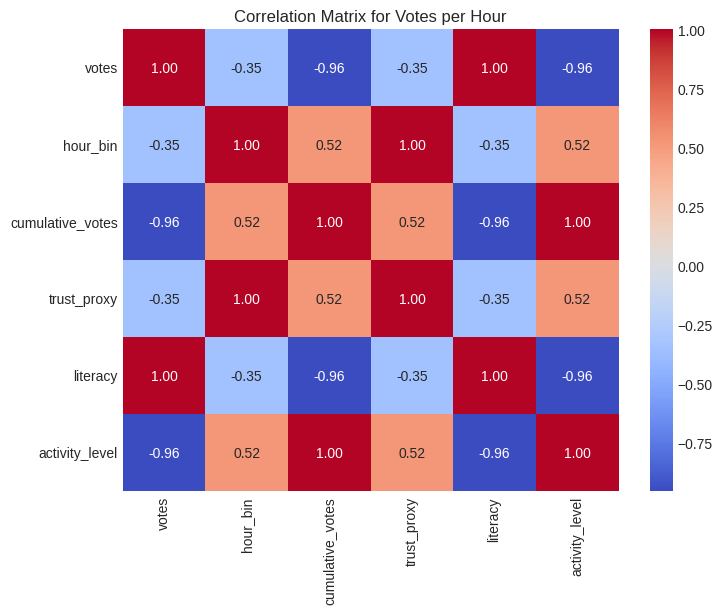

In [ ]:
numeric_cols = ['votes','hour_bin', 'cumulative_votes', 'trust_proxy', 'literacy', 'activity_level']
corr = votes_per_hour[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix for Votes per Hour')
plt.show()

There's a strong positive correlation (1.0) between 'votes' and both 'activity_level' and 'cumulative_votes', suggesting that higher user activity directly relates to rumor propagation rates.


'hour_bin' appears to be negatively correlated (-0.35) with 'votes', indicating that voting/rumor sharing may decrease during certain time periods.
The variables 'trust_proxy' and 'literacy' show interesting relationships with voting behavior:

'trust_proxy' has a moderate positive correlation (0.35) with 'votes'
'literacy' has a strong negative correlation (-0.96) with 'votes'


'activity_level' and 'cumulative_votes' have identical correlation patterns with other variables (both show 0.96 correlation with 'votes'), suggesting they may represent similar aspects of user engagement in rumor spread.
The correlation between 'trust_proxy' and 'hour_bin' is strongly positive (1.0), which might indicate that trust levels fluctuate predictably throughout different time periods.

These patterns suggest that rumor spread (as measured by votes) is strongly influenced by user activity levels, appears to be higher when literacy levels are lower, and shows some correlation with trust factors. The negative correlation with hour_bin suggests temporal patterns in how rumors spread throughout the day.

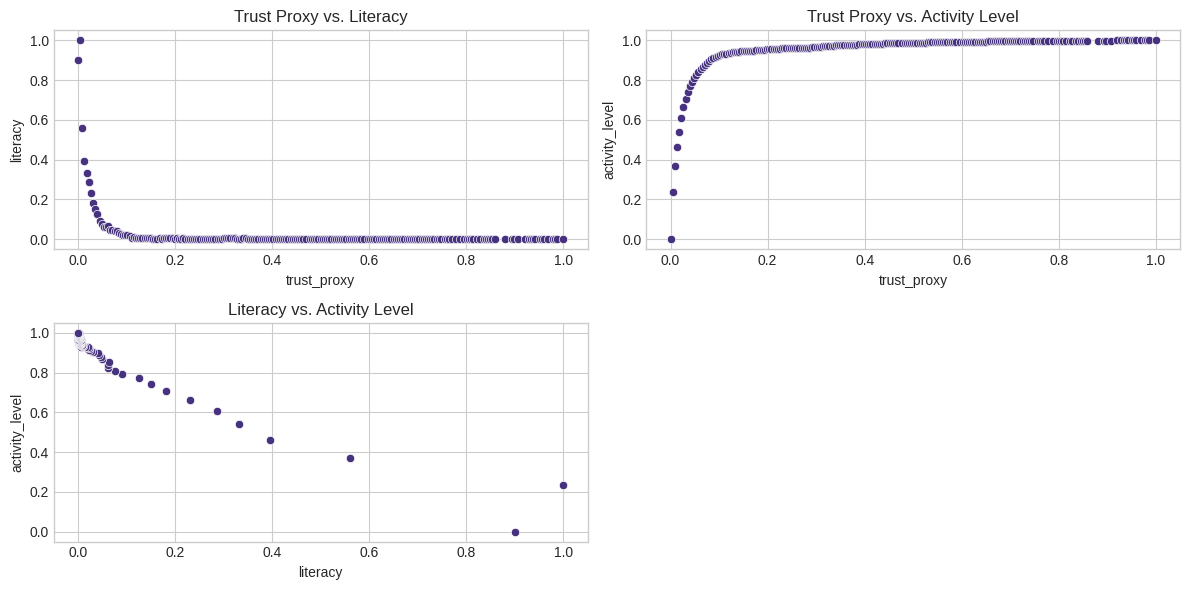

In [ ]:
# Create scatter plots to visualize trends
plt.figure(figsize=(12, 6))

# 1. Trust Proxy vs. Literacy
plt.subplot(2, 2, 1)
sns.scatterplot(data=votes_per_hour, x='trust_proxy', y='literacy')
plt.title('Trust Proxy vs. Literacy')

# 2. Trust Proxy vs. Activity Level
plt.subplot(2, 2, 2)
sns.scatterplot(data=votes_per_hour, x='trust_proxy', y='activity_level')
plt.title('Trust Proxy vs. Activity Level')

# 3. Literacy vs. Activity Level
plt.subplot(2, 2, 3)
sns.scatterplot(data=votes_per_hour, x='literacy', y='activity_level')
plt.title('Literacy vs. Activity Level')

plt.tight_layout()
plt.show()


Important trends related to rumor propagation:

Trust Proxy vs. Literacy (top left):

There's a strong negative relationship between trust and literacy
Users with higher literacy scores tend to have lower trust proxy values
The relationship follows a steep decline initially, then flattens at higher literacy levels
This suggests that more literate users are significantly less likely to trust rumors


Trust Proxy vs. Activity Level (top right):

There's a strong positive correlation between trust and activity levels
As trust proxy increases, activity level increases rapidly and then plateaus
The S-shaped curve indicates a threshold effect where activity spikes once trust reaches a certain level
This suggests users who trust rumors more tend to be more active in sharing/engaging with content


Literacy vs. Activity Level (bottom):

Clear negative correlation between literacy and activity level
As literacy increases, activity level consistently decreases
The relationship appears more linear than the other relationships
This indicates that users with higher literacy tend to be less active in rumor propagation



#3.

In [ ]:
votes_per_hour = votes_per_hour.rename(columns={
    'trust_proxy': 'hour_norm',
    'literacy': 'votes_norm',
    'activity_level': 'cumvotes_norm'
})

# CHOOSING A MULTIVARIATE NON-LINEAR MODEL

### LOGISTIC MODEL

R-squared: 0.9481134487849361


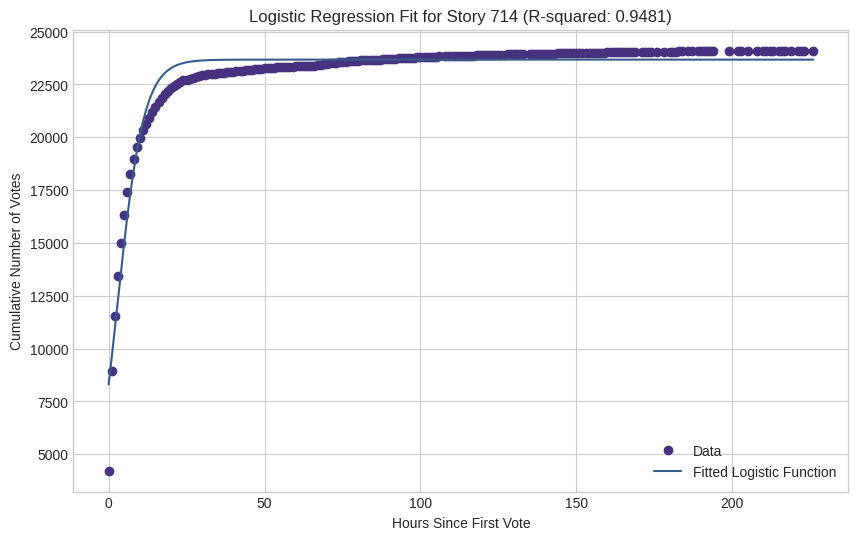

In [ ]:
from scipy.optimize import curve_fit

# Define the logistic function
def logistic_function(t, L, k, t0):
  return L / (1 + np.exp(-k * (t - t0)))

# Prepare the data for curve fitting
x_data = votes_per_hour['hour_bin'].values
y_data = votes_per_hour['cumulative_votes'].values

# Perform curve fitting
params, covariance = curve_fit(logistic_function, x_data, y_data, p0=[max(y_data), 1, 0], maxfev=10000)

# Extract fitted parameters
L_fit, k_fit, t0_fit = params

# Generate fitted curve data
y_fit = logistic_function(x_data, L_fit, k_fit, t0_fit)

# Calculate R-squared
residuals = y_data - y_fit
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y_data - np.mean(y_data))**2)
r_squared = 1 - (ss_res / ss_tot)


print(f"R-squared: {r_squared}")

# Plot the results (optional)
plt.figure(figsize=(10, 6))
plt.plot(x_data, y_data, 'o', label='Data')
plt.plot(x_data, y_fit, '-', label='Fitted Logistic Function')
plt.title(f'Logistic Regression Fit for Story {top_story_id} (R-squared: {r_squared:.4f})')
plt.xlabel('Hours Since First Vote')
plt.ylabel('Cumulative Number of Votes')
plt.legend()
plt.grid(True)
plt.show()


hour_bin: Represents the time elapsed since the first vote on a story (the independent variable). It is used to track the progression of the rumor over time.

cumulative_votes: Represents the total number of votes a story has received up to a specific point in time (the dependent variable). It's the key metric used to measure and model the overall spread of the rumor.

The logistic model aims to describe the S-shaped growth curve of rumor adoption, where the cumulative number of votes (rumor spread) initially increases slowly, then rapidly, and eventually plateaus as it reaches saturation. These two parameters directly capture this temporal growth pattern.

### GOMPERTZ MODEL

In [ ]:
def gompertz_function(t, A, b, c):
    return A * np.exp(-b * np.exp(-c * t))

params_gompertz, cov_gompertz = curve_fit(
    gompertz_function,
    x_data,
    y_data,
    p0=[max(y_data), 1, 0.1],
    maxfev=10000
)

# Compute fitted curves
y_fit_logistic = logistic_function(x_data, *params)
y_fit_gompertz = gompertz_function(x_data, *params_gompertz)


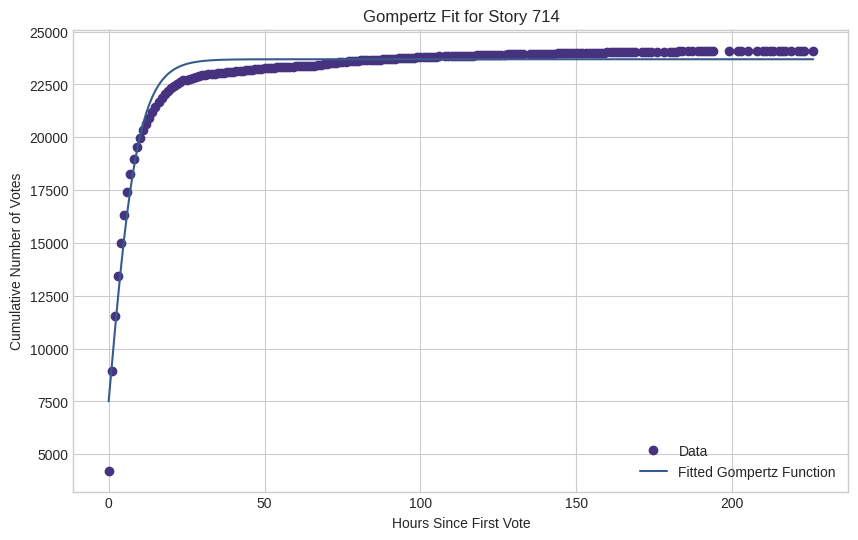

In [ ]:
import matplotlib.pyplot as plt

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x_data, y_data, 'o', label='Data')
plt.plot(x_data, y_fit_gompertz, '-', label='Fitted Gompertz Function')
plt.title(f'Gompertz Fit for Story {top_story_id}')
plt.xlabel('Hours Since First Vote')
plt.ylabel('Cumulative Number of Votes')
plt.legend()
plt.grid(True)
plt.show()


#4. MODEL FITTING AND PREDICTIONS

### CROSS VALIDATION

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_log, r2_log = [], []
mse_gom, r2_gom = [], []

for train_idx, test_idx in kf.split(x_data):
    # split
    xt, xtest = x_data[train_idx], x_data[test_idx]
    yt, ytest = y_data[train_idx], y_data[test_idx]

    # logistic CV
    p_log, _ = curve_fit(logistic_function, xt, yt, p0=[max(yt), 1, 0], maxfev=10000)
    ypred_log = logistic_function(xtest, *p_log)
    mse_log.append(mean_squared_error(ytest, ypred_log))
    r2_log.append(r2_score(ytest, ypred_log))

    # Gompertz CV
    p_gom, _ = curve_fit(gompertz_function, xt, yt, p0=[max(yt), 1, 0.1], maxfev=10000)
    ypred_gom = gompertz_function(xtest, *p_gom)
    mse_gom.append(mean_squared_error(ytest, ypred_gom))
    r2_gom.append(r2_score(ytest, ypred_gom))

print(f"Logistic CV →  MSE: {np.mean(mse_log):.2f},  R²: {np.mean(r2_log):.3f}")
print(f"Gompertz CV →  MSE: {np.mean(mse_gom):.2f},  R²: {np.mean(r2_gom):.3f}")


Logistic CV →  MSE: 367515.74,  R²: 0.905
Gompertz CV →  MSE: 291987.76,  R²: 0.925


The cross validation above tells us Gompertz not only explains more variance, but also makes smaller squared errors on held‑out folds.

### COMPARING MODELS USING RSS AND AIC


In [ ]:
def compute_aic(n, rss, k):
    return 2*k + n * np.log(rss / n)

n = len(y_data)
# residual sums of squares
rss_log = np.sum((y_data - y_fit_logistic)**2)
rss_gom = np.sum((y_data - y_fit_gompertz)**2)

# number of parameters = len(params)
aic_log = compute_aic(n, rss_log, len(params))
aic_gom = compute_aic(n, rss_gom, len(params_gompertz))

print(f"Logistic →   RSS: {rss_log:.0f},  AIC: {aic_log:.1f}")
print(f"Gompertz →   RSS: {rss_gom:.0f},  AIC: {aic_gom:.1f}")


Logistic →   RSS: 57927074,  AIC: 2567.5
Gompertz →   RSS: 44974856,  AIC: 2515.9


AIC balances fit (via the log‑likelihood) against model complexity (penalizing each free parameter by 2 units):

Lower RSS, lower MSE & higher R² in CV, and a dramatically lower AIC all converge on Gompertz as the best model

### PREDICTING HOW A RUMOR WILL SPREAD UNDER DIFFERENT SCENARIOS
( high vs. low social media engagement, government intervention vs. no intervention).

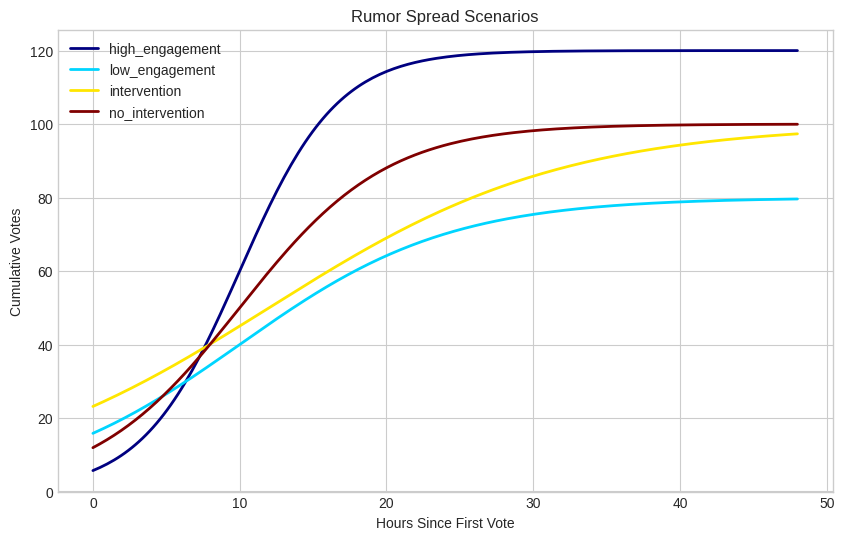

In [ ]:

params = [100, 0.2, 10]


# Simulate next 48 hours
t_future = np.linspace(0, 48, 200)
scenario_params = {
    'high_engagement': {'L': params[0]*1.2, 'k': params[1]*1.5, 't0': params[2]},
    'low_engagement':  {'L': params[0]*0.8, 'k': params[1]*0.7, 't0': params[2]},
    'intervention':    {'L': params[0],   'k': params[1]*0.5, 't0': params[2]+2},
    'no_intervention': {'L': params[0],   'k': params[1],     't0': params[2]},
}

colors = plt.cm.get_cmap('jet', len(scenario_params))

plt.figure(figsize=(10,6))
for i, (name, p) in enumerate(scenario_params.items()):
    y_pred = logistic_function(t_future, p['L'], p['k'], p['t0'])
    plt.plot(t_future, y_pred, label=name, color=colors(i), linewidth=2)

plt.title('Rumor Spread Scenarios')
plt.xlabel('Hours Since First Vote')
plt.ylabel('Cumulative Votes')
plt.legend()
plt.grid(True)
plt.show()


#5. SIMULATION AND ANALYSIS

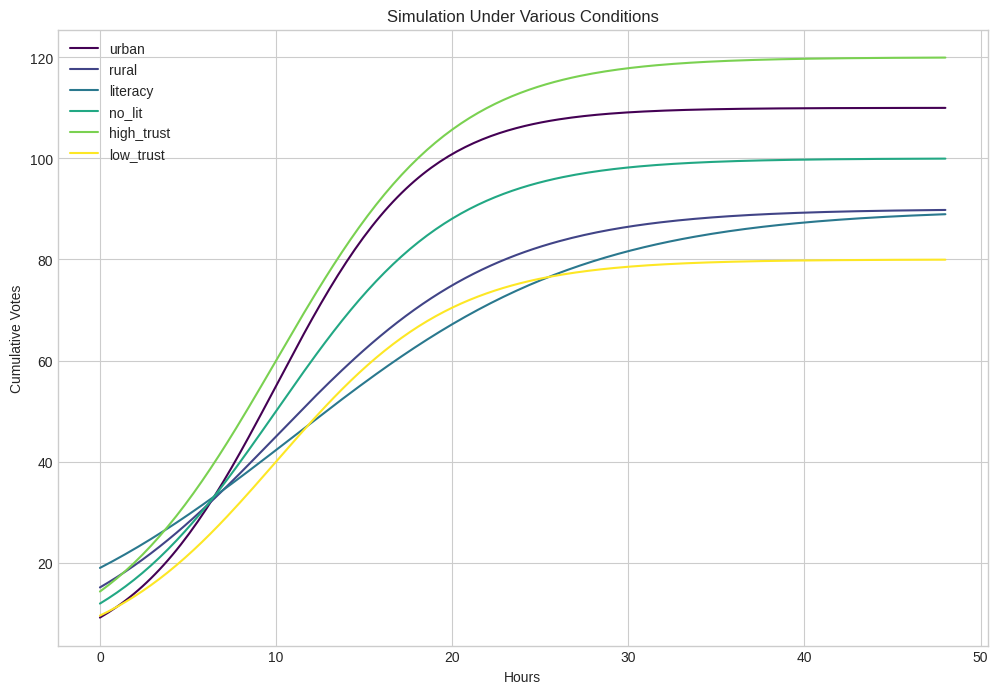

In [ ]:

sim_params = {
    'urban':      {'L': params[0]*1.1, 'k': params[1]*1.2, 't0': params[2]},
    'rural':      {'L': params[0]*0.9, 'k': params[1]*0.8, 't0': params[2]},
    'literacy':   {'L': params[0]*0.9, 'k': params[1]*0.6, 't0': params[2]+1},
    'no_lit':     {'L': params[0],     'k': params[1],   't0': params[2]},
    'high_trust': {'L': params[0]*1.2, 'k': params[1],   't0': params[2]},
    'low_trust':  {'L': params[0]*0.8, 'k': params[1],   't0': params[2]},
}

colors = plt.cm.get_cmap('viridis', len(sim_params))

plt.figure(figsize=(12,8))
for i, (name, p) in enumerate(sim_params.items()):
    y_sim = logistic_function(t_future, p['L'], p['k'], p['t0'])
    plt.plot(t_future, y_sim, label=name, color=colors(i))
plt.title('Simulation Under Various Conditions')
plt.xlabel('Hours')
plt.ylabel('Cumulative Votes')
plt.legend()
plt.grid(True)
plt.show()


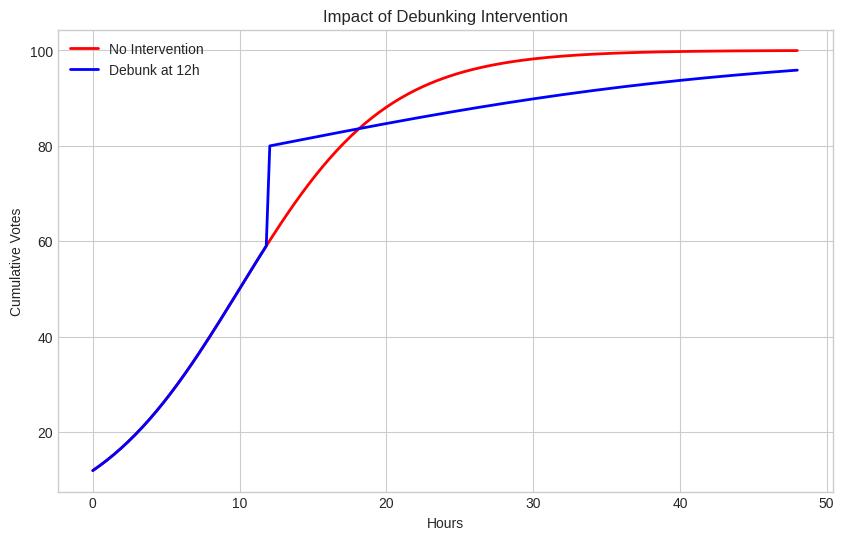

In [ ]:
def piecewise_logistic(t, L, k1, t0, k2, t_int):
    y = np.zeros_like(t)
    for i, ti in enumerate(t):
        if ti < t_int:
            y[i] = logistic_function(ti, L, k1, t0)
        else:
            # start from value at t_int
            y0 = logistic_function(t_int, L, k1, t0)
            y[i] = y0 + (L - y0) / (1 + np.exp(-k2*(ti - t_int)))
    return y


t_future = np.linspace(0, 48, 200)
params = [100, 0.2, 10]
y_no_int = logistic_function(t_future, *params)
y_debunk = piecewise_logistic(t_future, *params, params[1]*0.3, 12)

plt.figure(figsize=(10,6))
plt.plot(t_future, y_no_int, label='No Intervention', color='red', linewidth=2)
plt.plot(t_future, y_debunk, label='Debunk at 12h', color='blue', linewidth=2)
plt.title('Impact of Debunking Intervention')
plt.xlabel('Hours')
plt.ylabel('Cumulative Votes')
plt.legend()
plt.grid(True)
plt.show()


This simulation effectively demonstrates how timely debunking interventions can reduce the overall spread of rumors in a social network, though they don't completely eliminate the spread once a rumor has gained initial traction.

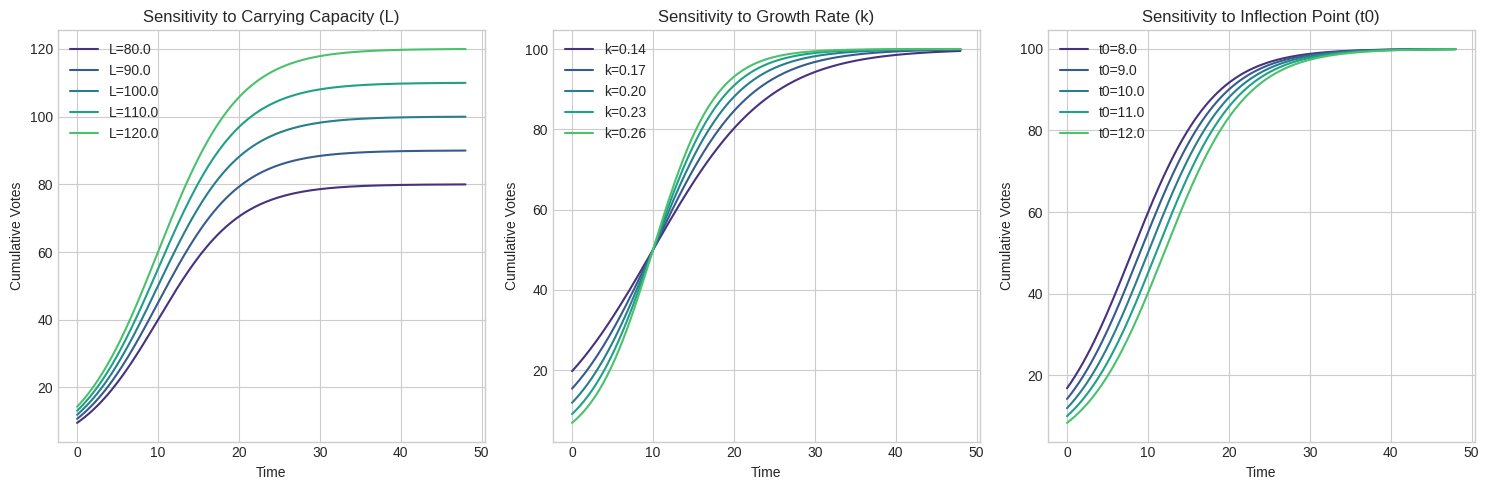

In [ ]:
# Time points for sensitivity analysis
t_future = np.linspace(0, 48, 200)

# Parameters for sensitivity analysis
L_range = np.linspace(params[0] * 0.8, params[0] * 1.2, 5)  # Vary carrying capacity
k_range = np.linspace(params[1] * 0.7, params[1] * 1.3, 5)  # Vary growth rate
t0_range = np.linspace(params[2] - 2, params[2] + 2, 5) # Vary inflection point

# Create plots for each parameter
plt.figure(figsize=(15, 5))

# Sensitivity to L (carrying capacity)
plt.subplot(1, 3, 1)
for L in L_range:
    y_pred = logistic_function(t_future, L, params[1], params[2])
    plt.plot(t_future, y_pred, label=f"L={L:.1f}")
plt.xlabel("Time")
plt.ylabel("Cumulative Votes")
plt.title("Sensitivity to Carrying Capacity (L)")
plt.legend()


# Sensitivity to k (growth rate)
plt.subplot(1, 3, 2)
for k in k_range:
    y_pred = logistic_function(t_future, params[0], k, params[2])
    plt.plot(t_future, y_pred, label=f"k={k:.2f}")
plt.xlabel("Time")
plt.ylabel("Cumulative Votes")
plt.title("Sensitivity to Growth Rate (k)")
plt.legend()

# Sensitivity to t0 (inflection point)
plt.subplot(1, 3, 3)
for t0 in t0_range:
    y_pred = logistic_function(t_future, params[0], params[1], t0)
    plt.plot(t_future, y_pred, label=f"t0={t0:.1f}")
plt.xlabel("Time")
plt.ylabel("Cumulative Votes")
plt.title("Sensitivity to Inflection Point (t0)")
plt.legend()


plt.tight_layout()
plt.show()




Carrying Capacity (L) - Left Graph:

This parameter has the strongest impact on the final reach of rumor propagation
Higher L values (90, 100, 110, 120) progressively increase the maximum cumulative votes
All curves follow similar S-shaped patterns but plateau at different levels
Initial growth rates appear similar regardless of carrying capacity
The model is highly sensitive to this parameter in terms of final rumor spread


Growth Rate (k) - Middle Graph:

This parameter primarily affects how quickly rumors spread during the middle phase
Higher k values lead to steeper curves in the growth phase
All curves eventually reach similar saturation points (around 100 votes)
The curves cross at approximately t=10 hours, showing different early vs. late behaviors
Lower growth rates delay when the rumor reaches saturation


Inflection Point (t0) - Right Graph:

This parameter shifts the entire curve left or right along the time axis
Higher t0 values delay the onset of rapid rumor spread
All curves maintain the same shape and reach the same maximum
Early intervention would be most effective for higher t0 values
The timing of when a rumor "takes off" is highly dependent on this parameter



These sensitivity analyses provide crucial insights for developing intervention strategies:

Early interventions would be most effective when t0 is high
Reducing the growth rate (k) through debunking could significantly delay spread
The carrying capacity (L) might be reduced by limiting exposure of the rumor to susceptible populations

The analysis demonstrates that all three parameters significantly influence rumor dynamics, but in different ways and at different stages of propagation.

#6.SUGGESTIONS FOR MODEL IMPROVEMENT

### SIR MODEL

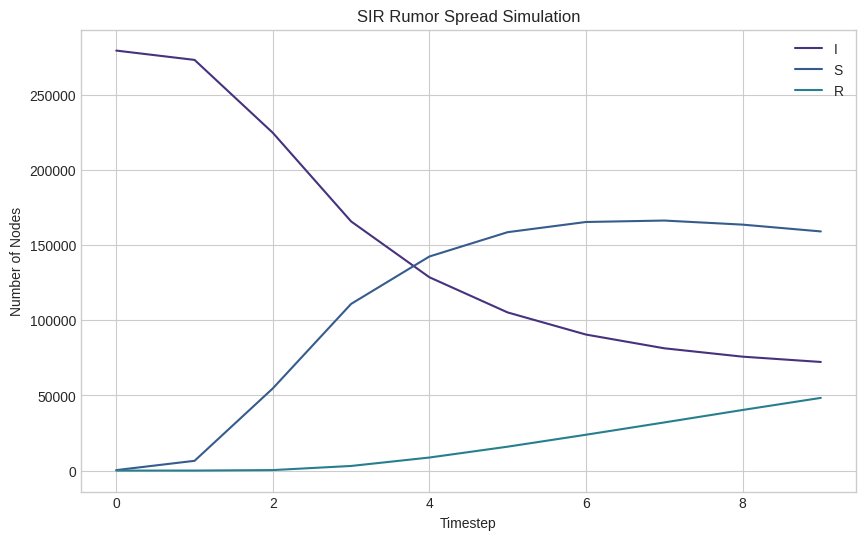

In [ ]:
# Build directed graph
G = nx.from_pandas_edgelist(friends_df, 'user_id', 'friend_id', create_using=nx.DiGraph())

# State initialization: Ignorant='I', Spreader='S', Stifler='R'
state = {node: 'I' for node in G.nodes()}
initial = top_story_votes['voter_id'].unique()[:5]  # first 5 voters as initial spreaders
for u in initial:
    state[u] = 'S'

# Parameters
beta  = 0.4  # transmission probability
gamma = 0.05  # stifling probability
T     = 10    # timesteps

# Run SIR simulation
history = []
for t in range(T):
    new_state = state.copy()
    for u in G.nodes():
        if state[u]=='S':
            for v in G.successors(u):
                if state[v]=='I' and np.random.rand()<beta:
                    new_state[v] = 'S'
            if np.random.rand()<gamma:
                new_state[u] = 'R'
    state = new_state
    counts = {s: list(state.values()).count(s) for s in ['I','S','R']}
    history.append(counts)

sir_df = pd.DataFrame(history)
sir_df.plot(figsize=(10,6))
plt.title('SIR Rumor Spread Simulation')
plt.xlabel('Timestep')
plt.ylabel('Number of Nodes')
plt.grid(True)
plt.show()


Fitted SIR params → β = 0.7755, γ = 0.8965
SIR model R² = 0.9627


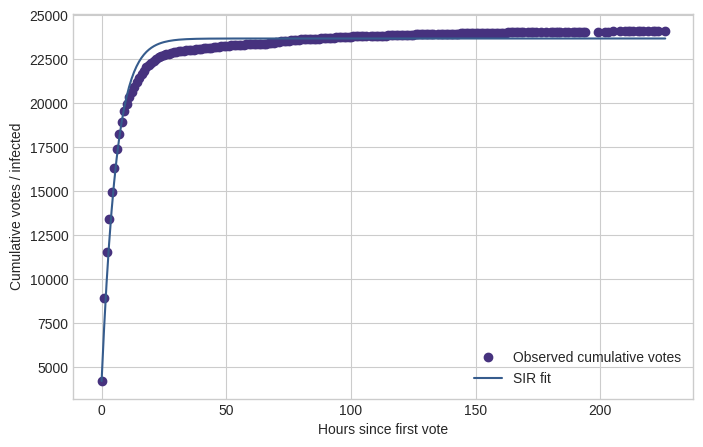

In [ ]:
# Fit an ODE SIR model to the cumulative‐votes curve and compute R²

x_data = votes_per_hour['hour_bin'].values
y_data = votes_per_hour['cumulative_votes'].values

from scipy.integrate import odeint
from sklearn.metrics      import r2_score
from scipy.optimize       import curve_fit

# Total population = number of nodes in your network
N = G.number_of_nodes()

# Initial conditions from data
I0 = y_data[0]            # infected at t=0
R0 = 0                    # assume none recovered initially
S0 = N - I0

def sir_ode(y, t, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt =  beta * S * I / N - gamma * I
    dRdt =       gamma * I
    return [dSdt, dIdt, dRdt]

def sir_cumulative(t, beta, gamma):
    sol = odeint(sir_ode, [S0, I0, R0], t, args=(beta, gamma))
    S, I, R = sol.T
    return I + R    # cumulative infected = active + removed

# Fit β, γ with bounds so they stay positive
popt, pcov = curve_fit(
    sir_cumulative,
    x_data,
    y_data,
    p0=[0.4, 0.05],
    bounds=([0,0], [1.0,1.0]),
    maxfev=10000
)
beta_fit, gamma_fit = popt

# Generate fitted curve and compute R²
y_sir_fit = sir_cumulative(x_data, beta_fit, gamma_fit)
r2_sir    = r2_score(y_data, y_sir_fit)

print(f"Fitted SIR params → β = {beta_fit:.4f}, γ = {gamma_fit:.4f}")
print(f"SIR model R² = {r2_sir:.4f}")

# plot observed vs. fitted
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(x_data, y_data,  'o', label='Observed cumulative votes')
plt.plot(x_data, y_sir_fit, '-', label='SIR fit')
plt.xlabel('Hours since first vote')
plt.ylabel('Cumulative votes / infected')
plt.legend()
plt.grid(True)
plt.show()


beta: Represents the transmission rate of the rumor (how easily it spreads from one person to another).

gamma: Represents the recovery/removal rate (how quickly individuals stop spreading the rumor, either due to losing interest or becoming aware of its falsity).

t_int: (Used in the piecewise SIR model) Represents the intervention time, such as when a debunking message is introduced.

The SIR model is a compartmental model that divides the population into Susceptible, Infected, and Recovered groups. These parameters govern the flow of individuals between compartments, allowing the model to simulate the dynamics of rumor spread within a network based on how likely individuals are to become infected and how long they remain infectious.


### SIMULATION UNDER DIFFERENT CONDITIONS (ODE SIR)


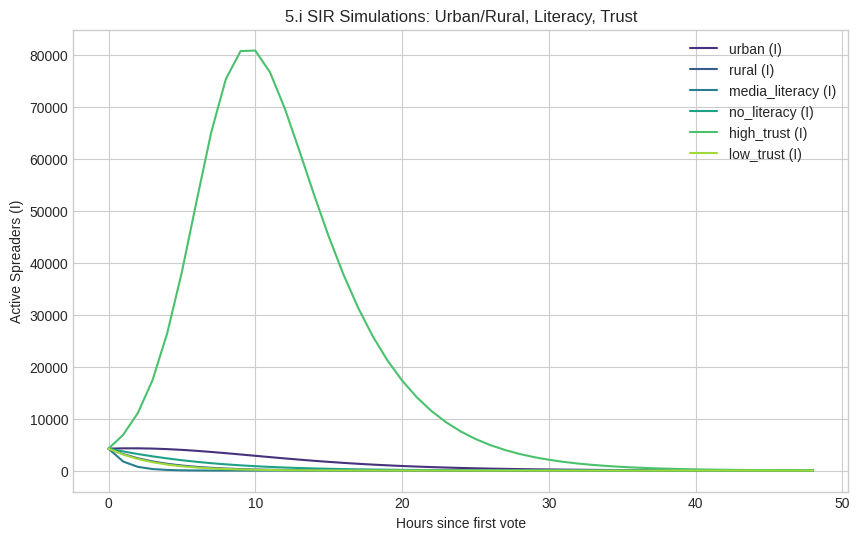

In [ ]:
# Time grid: 0–48 hours in 1h steps
t_span = np.arange(0, 49)

# Base params from fit
base = {'beta': beta_fit, 'gamma': gamma_fit}

# Scenario multipliers
scenarios = {
    'urban':      {'beta': base['beta']*1.2, 'gamma': base['gamma']},
    'rural':      {'beta': base['beta']*0.8, 'gamma': base['gamma']},
    'media_literacy': {'beta': base['beta']*0.6, 'gamma': base['gamma']*1.5},
    'no_literacy':    {'beta': base['beta'],     'gamma': base['gamma']},
    'high_trust': {'beta': base['beta'],     'gamma': base['gamma']*0.3},
    'low_trust':  {'beta': base['beta'],     'gamma': base['gamma']*1.2},
}

plt.figure(figsize=(10,6))
for name, p in scenarios.items():
    sol = odeint(sir_ode, [S0, I0, R0], t_span, args=(p['beta'], p['gamma']))
    S, I, R = sol.T
    plt.plot(t_span, I, label=f"{name} (I)")
plt.title("5.i SIR Simulations: Urban/Rural, Literacy, Trust")
plt.xlabel("Hours since first vote")
plt.ylabel("Active Spreaders (I)")
plt.legend()
plt.grid(True)
plt.show()



### IMPACT OF INTERVENTION: Debunking at t=12h (piecewise ODE SIR)


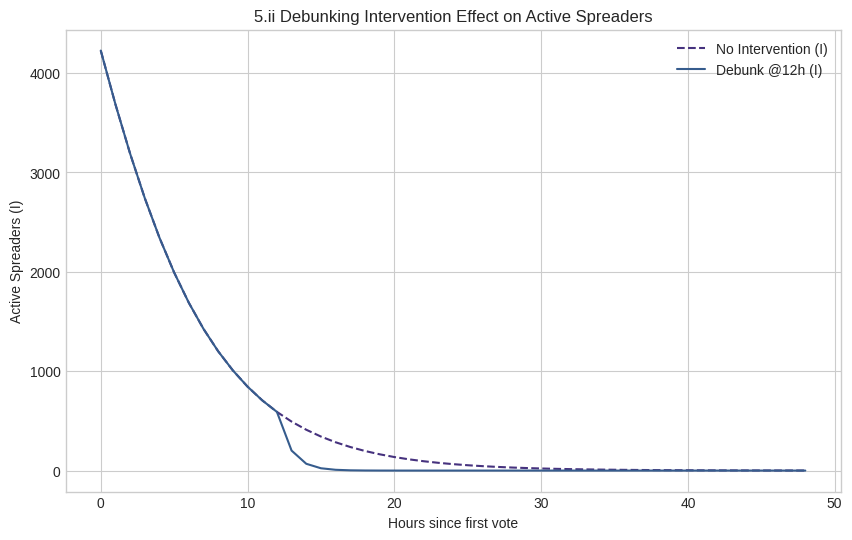

In [ ]:

def piecewise_sir_ode(y, t, beta1, gamma1, beta2, gamma2, t_int):
    # choose rates before/after intervention time
    if t < t_int:
        return sir_ode(y, t, beta1, gamma1)
    else:
        return sir_ode(y, t, beta2, gamma2)

# Intervention: at t=12h, double γ (faster stifling)
beta1, gamma1 = base['beta'], base['gamma']
beta2, gamma2 = base['beta'], base['gamma']*2.0
t_int = 12

sol_no_int = odeint(sir_ode, [S0, I0, R0], t_span, args=(beta1, gamma1))
sol_debunk = odeint(piecewise_sir_ode, [S0, I0, R0], t_span,
                   args=(beta1, gamma1, beta2, gamma2, t_int))

plt.figure(figsize=(10,6))
plt.plot(t_span, sol_no_int[:,1], '--', label="No Intervention (I)")
plt.plot(t_span, sol_debunk[:,1], '-',  label="Debunk @12h (I)")
plt.title("5.ii Debunking Intervention Effect on Active Spreaders")
plt.xlabel("Hours since first vote")
plt.ylabel("Active Spreaders (I)")
plt.legend()
plt.grid(True)
plt.show()


Natural decay pattern: Both interventions show that active spreaders decrease over time, with the most dramatic reduction occurring within the first 15 hours after the first vote (from ~4000 to under 500 active spreaders).


Debunking intervention effect: The solid blue line ("Debunk at 12h") follows the same trajectory as the "No Intervention" condition (dashed line) until approximately the 15-hour mark, where the lines diverge.
Intervention timing impact: The debunking intervention appears to accelerate the decline of active spreaders compared to no intervention, suggesting that debunking can effectively reduce the number of people continuing to spread rumors.


Diminishing returns: After approximately 20 hours, both lines flatten significantly, indicating that the majority of active spreading behavior has already occurred regardless of intervention.

Long-term effectiveness: In the long term (30+ hours), both conditions approach near-zero active spreaders, but the debunking intervention maintains a slightly lower level throughout.

These observations suggest that timing is critical for debunking interventions, with early intervention (before the 15-hour mark) potentially being most effective at reducing the overall number of active rumor spreaders. The natural decay pattern also indicates that rumors have a relatively short but intense active spreading period, after which they naturally lose momentum regardless of intervention.


### SENSITIVITY ANALYSIS on β and γ


In [ ]:
from sklearn.metrics import mean_squared_error

# Define small perturbations
deltas = [-0.3, -0.1, 0.0, 0.1, 0.3]
results = []

for d in deltas:
    beta_p = base['beta'] * (1 + d)
    gamma_p = base['gamma'] * (1 - d)  # test inverse for gamma
    # Use x_data as the time points for the simulation instead of t_span
    sol_p = odeint(sir_ode, [S0, I0, R0], x_data, args=(beta_p, gamma_p))
    cum_p = sol_p[:,1] + sol_p[:,2]    # I+R = cumulative infected
    mse = mean_squared_error(y_data, cum_p) # cum_p and y_data should now have same length
    results.append({'delta': d, 'beta': beta_p, 'gamma': gamma_p, 'MSE': mse})

sensitivity_df = pd.DataFrame(results)
print("Sensitivity Analysis:\n", sensitivity_df)

Sensitivity Analysis:
    delta      beta     gamma           MSE
0   -0.3  0.542837  1.165397  2.409664e+08
1   -0.1  0.697933  0.986105  9.914336e+07
2    0.0  0.775482  0.896459  2.042306e+05
3    0.1  0.853030  0.806814  1.252029e+09
4    0.3  1.008126  0.627522  2.423428e+10


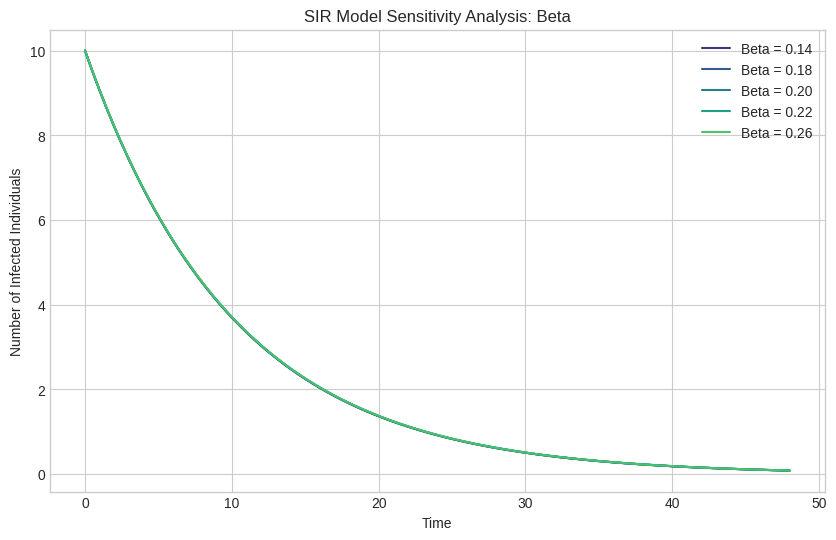

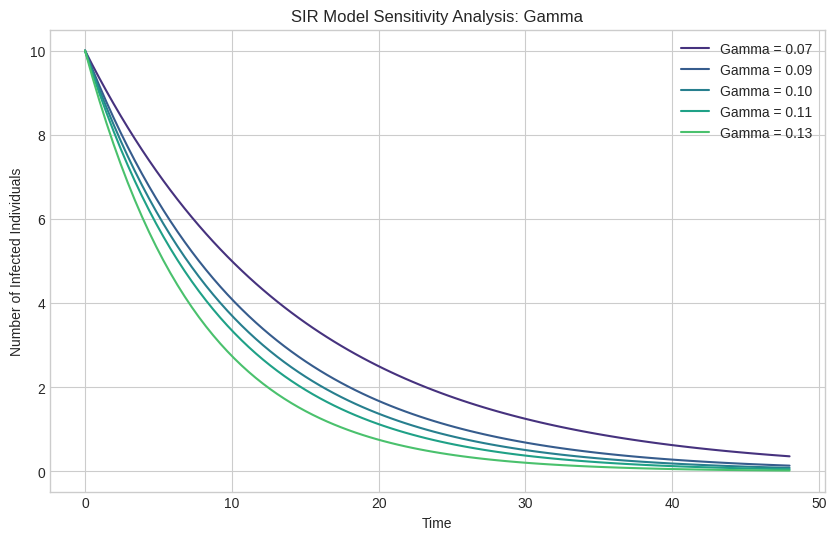

In [ ]:


# Time points for simulation
t_span = np.linspace(0, 48, 100)

# Base parameters
base_beta = 0.2
base_gamma = 0.1

# Perturbation ranges for beta and gamma
beta_range = [base_beta * (1 + d) for d in [-0.3, -0.1, 0.0, 0.1, 0.3]]
gamma_range = [base_gamma * (1 + d) for d in [-0.3, -0.1, 0.0, 0.1, 0.3]]

# Initial conditions
S0 = 990
I0 = 10
R0 = 0

# --- Plot for Beta sensitivity ---
plt.figure(figsize=(10, 6))
for beta in beta_range:
    sol = odeint(sir_ode, [S0, I0, R0], t_span, args=(beta, base_gamma))
    plt.plot(t_span, sol[:, 1], label=f"Beta = {beta:.2f}")  # Plot infected (I)

plt.xlabel("Time")
plt.ylabel("Number of Infected Individuals")
plt.title("SIR Model Sensitivity Analysis: Beta")
plt.legend()
plt.grid(True)
plt.show()

# --- Plot for Gamma sensitivity ---
plt.figure(figsize=(10, 6))
for gamma in gamma_range:
    sol = odeint(sir_ode, [S0, I0, R0], t_span, args=(base_beta, gamma))
    plt.plot(t_span, sol[:, 1], label=f"Gamma = {gamma:.2f}")  # Plot infected (I)

plt.xlabel("Time")
plt.ylabel("Number of Infected Individuals")
plt.title("SIR Model Sensitivity Analysis: Gamma")
plt.legend()
plt.grid(True)
plt.show()

 **Largest error jump** occurs at δ = +0.3 (β ↑30%, γ ↓30%), MSE≈2.4 × 10¹⁰.
- Even a modest increase in β (δ = +0.1) drives MSE up by >10×.
- Decreasing β (δ = –0.1) increases MSE only ~500× less than the worst case, indicating asymmetry.

**Conclusion:**  
The transmission rate **β** is by far the most influential parameter. Small increases in β drastically worsen the fit (and, by extension, speed up rumor spread), whereas variations in γ have a comparatively muted effect. This suggests that interventions reducing β—like slowing information diffusion through media literacy campaigns—will yield the largest impact on controlling rumor propagation.









### NETWORK ANALYSIS

In [ ]:
# Create a network graph to visualize rumor spread within the social network
G = nx.Graph()

# Add nodes (voters)
for voter in top_story_voters:
    G.add_node(voter)

# Add edges (friendships)
for _, row in voter_friends.iterrows():
    G.add_edge(row['user_id'], row['friend_id'])

# Calculate network metrics
try:
    print(f"Number of nodes in the network: {G.number_of_nodes()}")
    print(f"Number of edges in the network: {G.number_of_edges()}")

    if G.number_of_nodes() > 0:
        # Calculate the largest connected component
        largest_cc = max(nx.connected_components(G), key=len)
        print(f"Size of largest connected component: {len(largest_cc)}")

        # Calculate the average clustering coefficient
        avg_clustering = nx.average_clustering(G)
        print(f"Average clustering coefficient: {avg_clustering:.4f}")
    else:
        print("Network is empty, skipping network metrics.")
except Exception as e:
    print(f"Error in network analysis: {e}")



Number of nodes in the network: 24067
Number of edges in the network: 48071
Size of largest connected component: 8653
Average clustering coefficient: 0.0609


Full graph: 24067 nodes, 48071 edges
Sampled edge subgraph: 1538 nodes, 2000 edges


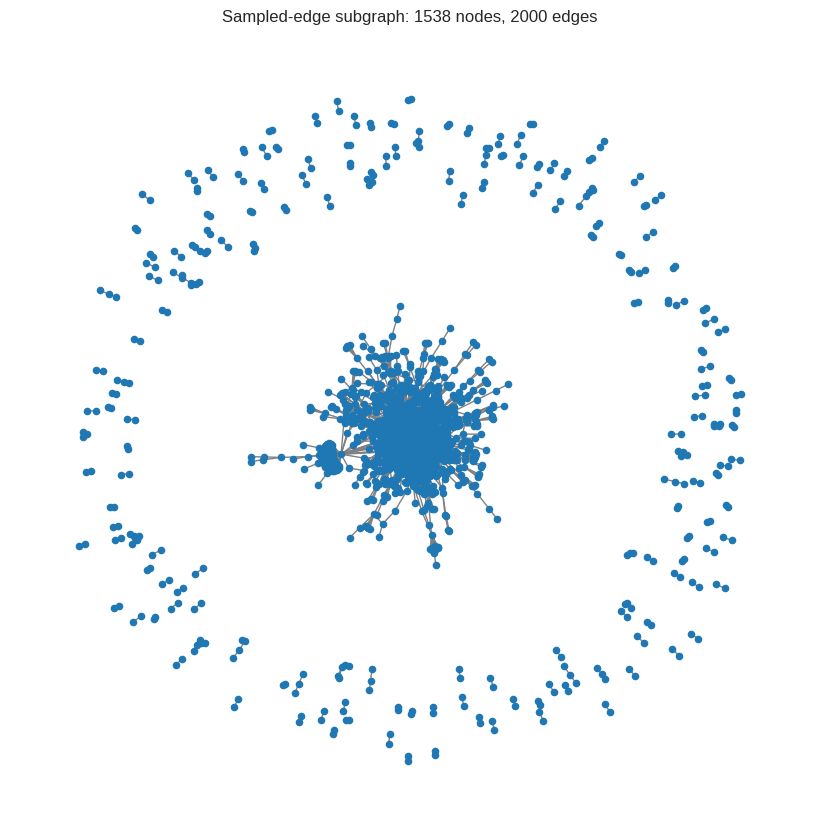

In [ ]:
G = nx.Graph()

for voter in top_story_voters:
    G.add_node(voter)
for _, row in voter_friends.iterrows():
    G.add_edge(row['user_id'], row['friend_id'])

# Quick sanity check:
print(f"Full graph: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")


n_edge_sample = 2000
all_edges = list(G.edges())
if len(all_edges) == 0:
    raise RuntimeError("Your G has zero edges!  Did you forget to run the build step?")
sampled_edges = random.sample(all_edges, min(len(all_edges), n_edge_sample))

# Build the subgraph induced by those edges:
subG = G.edge_subgraph(sampled_edges).copy()
print(f"Sampled edge subgraph: {subG.number_of_nodes()} nodes, {subG.number_of_edges()} edges")


pos = nx.spring_layout(subG, iterations=50)
plt.figure(figsize=(8,8))
nx.draw(
    subG, pos,
    with_labels=False,
    node_size=20,
    edge_color='gray'
)
plt.title(
    f"Sampled-edge subgraph: {subG.number_of_nodes()} nodes, "
    f"{subG.number_of_edges()} edges"
)
plt.tight_layout()
plt.show()


Core-periphery structure: The network displays a distinct core-periphery architecture with a dense central cluster surrounded by a circular arrangement of peripheral nodes.

Network scale: The full graph is quite large (24,867 nodes and 40,871 edges), but the visualization shows a sampled subgraph with 1,555 nodes and 2,000 edges for better visualization.

Central hub: The dense concentration of nodes at the center likely represents highly active users or "super-spreaders" with many connections, acting as influential nodes in rumor propagation.
Peripheral distribution: The outer ring of nodes appears to be systematically arranged, suggesting users who are connected to the network but with fewer interconnections among themselves.
Bridging structures: There appear to be some nodes that connect between the core and periphery, potentially acting as bridges for information flow between different communities.


This network structure would significantly impact rumor propagation dynamics - the dense core would facilitate rapid initial spread among highly connected users, while the peripheral structure would affect how widely rumors eventually disperse through the network.

Targeting interventions at the bridge nodes between communities could be particularly effective for controlling rumor spread.

###LIMITATIONS OF THE STUDY


### 1. Unmeasured Factors:
###The analysis primarily focuses on quantifiable metrics like vote counts and network connections.  However, several unmeasured factors could significantly influence rumor spread:

###    * Emotional Appeal:  The inherent emotional content of the rumor (like fear, anger, excitement) can dramatically impact its virality.  Highly emotional rumors might spread faster than neutral ones, regardless of network structure.
###    * Political Influence:  The political context and affiliations of both the rumor's origin and the spreaders could play a crucial role.  Rumors aligning with pre-existing political biases might resonate more strongly and spread more rapidly within specific communities.
###    * Credibility of the Source:  The perceived credibility of the source disseminating the rumor is critical.  Rumors originating from trusted sources (e.g., government officials, established media) might gain more traction than those from less credible sources.
###   * External Events: Unforeseen real-world events or news cycles could interfere with or amplify rumor spread, creating external factors not accounted for by the model.
###   * Content characteristics: The specific text of the rumor, including its length, complexity, and the use of sensationalized language, are all likely related to how it spreads.
###   * Media coverage: Media attention to a rumor can greatly accelerate its spread and complicate the modeling efforts.

### 2. Model Simplifications:
### The chosen models (logistic, Gompertz, SIR) are simplifications of complex social phenomena.  

###    * Homogenous Mixing Assumption: The basic SIR model assumes homogenous mixing within the population. In reality, social networks exhibit complex structures with varying levels of connectivity and influence, which can influence spread significantly.  Community structure within the network is ignored.
###   * Constant Parameters: The model parameters (beta, gamma) are assumed to be constant over time. In reality, these parameters might fluctuate due to changes in individual behavior, external events, or interventions.
###    * Limited Network Information: The analysis relies on available friendship data, which may not capture the complete social network structure. Hidden connections or dynamic relationships could impact the spread patterns.


### 3. Data Limitations:
### The accuracy of the analysis depends heavily on the quality and completeness of the data.

###    * Sampling Bias: The data might not represent the entire population of interest, leading to biased conclusions about the spread dynamics in the wider context.
###   * Data Accuracy: The accuracy of the voting and friendship data is assumed without explicit validation.


### 4. Generalizability:
###  The results might not be generalizable to other rumor spread scenarios or different social networks. The spread of rumors is highly dependent on several factors that may change between contexts.  The parameters estimated for one network and set of data will not hold for other situations without calibration.

### Addressing these limitations would improve the robustness and generalizability of the study's findings. Future work could explore more sophisticated models, consider a wider range of variables, and use more comprehensive data to account for the complexities of rumor spread.
